## Medal Sport Wise Analysis

In this analysis, we will be counting the number of medals (gold, silver and bronze) for each country and each year sports wise. We are also plotting the appropriate graphs in order to better visualize our analysis. This analysis can be used to understand which country is good at which sport. By using this analysis, countries can know which sports they are weak at and hence can invest more time and effort in those sports in order to win more medals. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Loading the Asian Games medal list dataset.

df_asian = pd.read_csv("Medal_List_Asian.csv")

In [3]:
##Truncating the '.0' from the years column. (converting 2018.0 to 2018)

df_asian["Year"] = [int(x) for x in df_asian["Year"].tolist()]
df_asian = df_asian.astype({"Year":object})
df_asian.rename(columns = {"Nation":"Country"},inplace=True)

In [4]:
##Earlier china was know as "Republic of china" and sri lanka was known as "Ceylon", hence changing their names as per the new 
##conventions.

df_asian.replace("Republic of China","China",inplace=True)
df_asian.replace("Ceylon","Sri Lanka",inplace=True)
df_asian.replace("Field hockey","Hockey",inplace=True)

In [5]:
##Loading the Olympics games medal list dataset.

df_oly = pd.read_csv("Medal_List_Olympics.csv")
df_oly.replace("Field hockey","Hockey",inplace=True)

In [6]:
## This is the block of code in which i am calculating the number of medals won by the asian counties in both "Asian" and 
##"Olympic" games sports wise.
##This is the helper funtion that will take the inputs as game : which game to analyze, country: which country to provide the
##analysis for and year: which year to consider for analysis.

def Helper3(game,game_df,country,year):
    
    if(year != "Overall"):  ##If user asks the analysis for a particular year.
        li3=[]
        df = game_df[game_df["Year"] == year]  ##Filtering the dataframe according to a particular year.
        countries = df["Country"].unique().tolist()
        ans3_df = pd.DataFrame()
        for nation in countries:  ##For every country i am calculating the total number of medals won sports wise.
            df_c = df[(df["Country"] == nation)]
            ans3_df = pd.concat([ans3_df,df_c[["Country","Sport","Year","Gold","Silver","Bronze","Total"]]])
        ans3_df.sort_values(["Country","Sport"],ascending=[True,True],inplace=True)
        ans3_df.reset_index(drop=True,inplace=True)
        
    
    ##Here i am calculating the total number of medals for all countries considering all years.
    li4=[]
    countries = game_df["Country"].unique().tolist()
    games = game_df["Sport"].unique().tolist()
    for nation in countries:
        for sport in games:
            df_c = game_df[(game_df["Sport"] == sport) & (game_df["Country"] == nation)]
            if(df_c.empty):
                continue
            li4.append((nation,sport,df_c["Gold"].sum(),df_c["Silver"].sum(),df_c["Bronze"].sum(),df_c["Total"].sum()))
    ans4_df = pd.DataFrame(li4,columns=["Country","Sport","Gold","Silver","Bronze","Total"])
    ans4_df.sort_values(["Country","Sport"],ascending=[True,True],inplace=True)
    ans4_df.reset_index(drop=True,inplace=True)
    
    
    
    if(country == "Overall" and year == "Overall"):
    ##returning the dataframe if user asks the analysis for all countries and all years.
        return ans4_df
    
    elif(country == "Overall" and year != "Overall"):
    ##returning the dataframe if user asks the analysis for all countries and a particular year.
        return ans3_df
    
    elif(country != "Overall" and year == "Overall"):
    ##plotting the graph and returning the dataframe if user asks the analysis for a particular country and all years.
        df =  ans4_df[ans4_df["Country"] == country]
        fig = plt.figure(figsize = (15, 5))
        sns.barplot(df["Sport"],df["Total"],ci=None,dodge=False)
        plt.xticks(rotation = 45)
        plt.title("No Of Medals Won By "+country+" Sports Wise in "+game+" Games",fontsize = 20)
        plt.xlabel("Sports",fontsize=15)
        plt.ylabel("Total Medals",fontsize=15)
        for i in range(len(df["Sport"].values)):  ##Adding labels to bars in bar graph.
            plt.text(i,df["Total"].values[i],df["Total"].values[i],ha='center')
        return (df,plt)
    
    elif(country != "Overall" and year != "Overall"):
    ##plotting the graph and returning the dataframe if user asks the analysis for a particular country and a particular year.
        df =  ans3_df[ans3_df["Country"] == country]
        fig = plt.figure(figsize = (15, 5))
        sns.barplot(df["Sport"],df["Total"],ci=None,dodge=False)
        plt.xticks(rotation = 45)
        plt.title("No Of Medals Won By "+country+" in "+str(year)+" Sport Wise",fontsize = 20)
        plt.xlabel("Sports",fontsize=15)
        plt.ylabel("Total Medals",fontsize=15)
        for i in range(len(df["Sport"].values)):  ##Adding labels to bars in bar graph.
            plt.text(i,df["Total"].values[i],df["Total"].values[i],ha='center')
        return (df,plt)
    
    
def Medal_sport_wise(game,country,year):  ##This is the main function that will be called as soon as the user inputs something.
    
    if(game == "Asian"):  ##If the user wants the analysis for asian games then we call the helper function by proving it with asian
        return Helper3(game,df_asian.copy(),country,year)
    elif(game == "Olympics"):  ##If the user wants the analysis for olympic games then we call the helper function by proving it with olympic games dataset.
        return Helper3(game,df_oly.copy(),country,year)
    elif(game == "Both"):  ##In this case the helper function will be called twice first for asian games and then for olympic games.
        return (Helper3("Asian",df_asian.copy(),country,year),Helper3("Olympics",df_oly.copy(),country,year))

C:\Users\Deepak Raj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


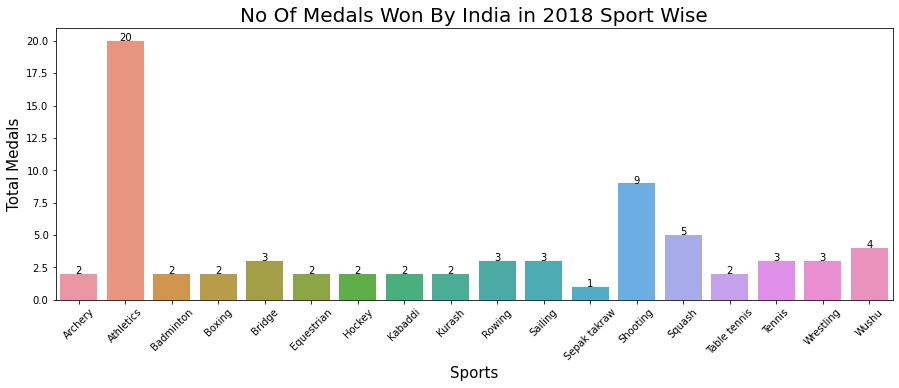

In [7]:
df,fig = Medal_sport_wise("Asian","India",2018)

C:\Users\Deepak Raj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


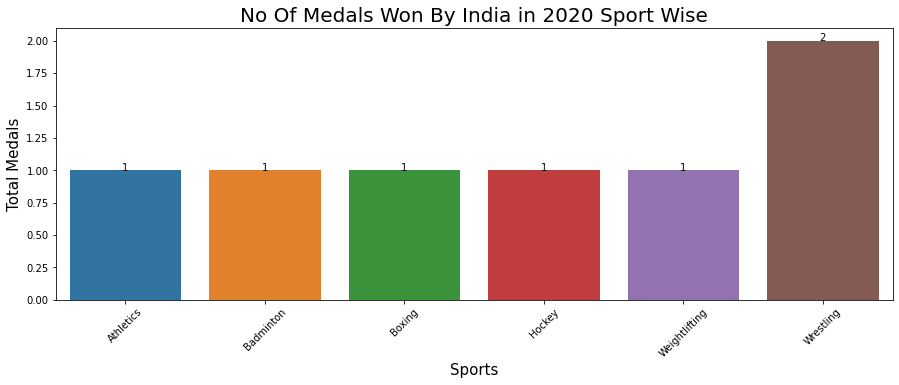

In [8]:
df,fig = Medal_sport_wise("Olympics","India",2020)

C:\Users\Deepak Raj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


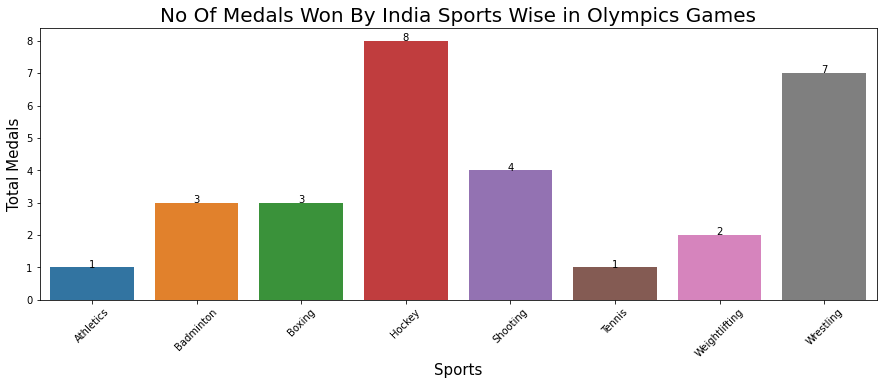

In [9]:
df,fig = Medal_sport_wise("Olympics","India","Overall")

C:\Users\Deepak Raj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


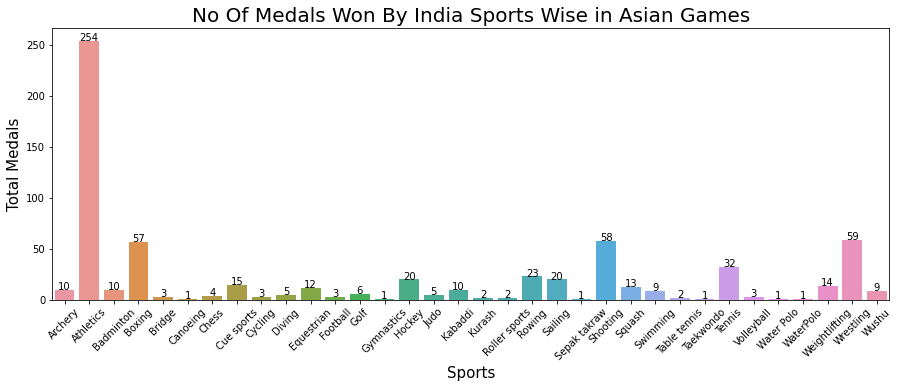

In [10]:
df,fig = Medal_sport_wise("Asian","India","Overall")